In [1]:
from __future__ import print_function

import importlib
resources = importlib.import_module("resources")
import resources.MonteCarlo as MC

import numpy as np
import pandas as pd
import random
random.seed(2010)

import keras
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import backend as K


Using TensorFlow backend.


In [2]:
inv_f = lambda x : MC.inverse_uniform(x,0,1000)
X = MC.RandomVariable(inv_f,"uniform distribution from x=1:5")
sample_ratio  = .5

def two_linear_functions(x,slope1,slope2,intercept1,intercept2,std_dev1=1,std_dev2=1):
    coin_toss = (random.random() > sample_ratio)
    if coin_toss:
        return (MC.Linear_GaussianNoise(x,slope1,intercept1,std_dev1))
    else:
        return (MC.Linear_GaussianNoise(x,slope2,intercept2,std_dev2))
def two_functions(x,slope1,slope2,intercept1,intercept2,std_dev1=1,std_dev2=1):
    coin_toss = (random.random() > sample_ratio)
    if coin_toss:
        return (MC.Quad_GaussianNoise(x,slope1,intercept1,std_dev1))
    else:
        return (MC.Quad_GaussianNoise(x,slope2,intercept2,std_dev2))

def two_split_linear_functions(x,x_stop,x_start,slope1,slope2,intercept1,intercept2,std_dev1=1,std_dev2=1):
    if x<x_stop:
        return (x,MC.Linear_GaussianNoise(x,slope1,intercept1,std_dev1))
    else:
        return (x+x_start-x_stop,MC.Linear_GaussianNoise(x+x_start-x_stop,slope2,intercept2,std_dev2))
        

    
#cost_f = lambda x : (x,two_linear_functions(x,1,0,0,0,20,20))
#cost_f = lambda x : two_split_linear_functions(x,400,600,5,-2,0,0,5,5)
cost_f = lambda x : (x,two_functions(x,np.pi,-16.2,0,20,1,1))
generate_toy_data = MC.Simulator(X,cost_f,'generator for two linear functions from x=1:5', verbose = True)

for y in generate_toy_data.sample_repeated(10):
    print (y)

testing random variable with distribution uniform distribution from x=1:5,
 139

New simulator for generator for two linear functions from x=1:5,
 with uniform distribution from x=1:5 input
(486.6525117612371, -2421882.102956885)
(546.662624463851, -3232002.0356185543)
(973.4140484418796, -12358183.281898137)
(878.1434984088488, -9809198.217476692)
(755.8576184813135, -6968396.335418317)
(605.2944401934303, -4136205.024232855)
(496.1507553335034, 493026.25884887384)
(495.99104578343145, 492629.84408849286)
(223.13309886940226, -245601.54698535806)
(648.9468843408174, -4881731.999485645)


In [9]:
#################################
#######Construct Network#########
#################################


# Define sudoMin loss function


# Convolutional layers

# Example from Keras github


batch_size = 128
no_predictions = 2
epochs = 10000

def customLoss(yTrue,yPred):
    return K.sum(K.min(K.square(yTrue-yPred),axis = 1))



sample_ratio = .5
TrainData = list(generate_toy_data.sample_repeated(400))
x_train, y_train  = zip(*TrainData)
TestData = list(generate_toy_data.sample_repeated(10))
x_test, y_test  = zip(*TestData)
x_train = np.array(x_train,ndmin = 2).T
y_train = np.array(y_train,ndmin = 2).T
x_test = np.array(x_test,ndmin = 2).T
y_test = np.array(y_test,ndmin = 2).T
# the data, split between train and test sets

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices


model = Sequential()
model.add(Dense(64, activation='relu',
                kernel_initializer='random_uniform', bias_initializer='zeros',
                input_shape=[1]))
model.add(Dense(64, activation='relu',
                kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(32, activation='relu',
                kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(no_predictions, activation='linear'))

model.compile(loss=customLoss,
              optimizer=keras.optimizers.Nadam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])



x_train shape: (400, 1)
400 train samples
10 test samples
Test loss: 19825233920.0


Text(0.5,1,'Multimodal Output, Toy Results')

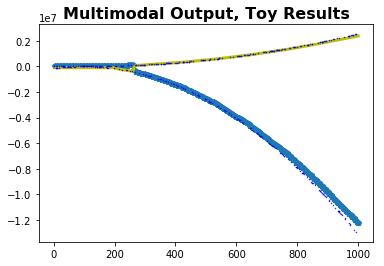

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

X = np.linspace(5, 1000, 200)
Y1,Y2 = zip(*model.predict(X))
#Y1,Y2,Y3,Y4 = zip(*model.predict(X))

plt.scatter(x_train, y_train,s = .2, c='blue',zorder=2)
#plt.scatter(x_test, y_test, s = .2 ,c='black',zorder=2)


plt.plot(X,Y1, 'p-',linewidth = 3,zorder=1)
plt.plot(X,Y2, 'y-',linewidth = 3,zorder=1)
#plt.plot(X,Y3, 'b-',linewidth = 3)
#plt.plot(X,Y4, 'y-',linewidth = 3)

#plt.ylim(0,300)
# Add title and x, y labels
plt.title("Multimodal Output, Toy Results", fontsize=16, fontweight='bold')


In [11]:
#Visualize Nodes
def customLoss(yTrue,yPred):
    t = K.variable(yTrue)
    p = K.variable(yPred)
    print(yTrue)
    print(yPred)
    print(K.eval(K.square(t)))
    print(K.eval(K.square(p)))
    print(K.eval(K.square(t-p)))
    
    X = K.square(t-p)
    X= K.min(K.square(t-p),axis= 1)
    return K.eval(X)
print(customLoss(np.array([[1],[2]]),np.array([[1,2,3],[4,5,6]])))




[[1]
 [2]]
[[1 2 3]
 [4 5 6]]
[[1.]
 [4.]]
[[ 1.  4.  9.]
 [16. 25. 36.]]
[[ 0.  1.  4.]
 [ 4.  9. 16.]]
[0. 4.]


In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
[y_test-model.predict(x_test)]


[array([[-5.97651093e+04, -3.00975542e+06],
        [ 7.61926276e+06,  6.05897581e+04],
        [-8.68026825e+03, -1.34381175e+06],
        [ 1.40099368e+03,  1.07440125e+05],
        [ 1.13099849e+07,  1.00517907e+05],
        [-3.70617626e+04, -2.46218054e+06],
        [-1.90313930e+04, -6.66190698e+05],
        [ 4.42924448e+03,  1.10468376e+05],
        [ 4.64454182e+06,  2.52527618e+04],
        [ 2.83229605e+03,  1.08871412e+05]])]